In [39]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor



In [40]:
data = pd.read_csv("daily_weather.xls")

In [41]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB
None
            number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
count  1095.000000       1092.000000   1090.000000             1091.0

In [42]:
columns = data.columns

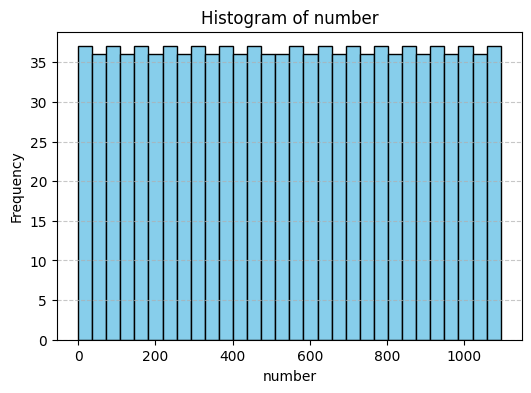

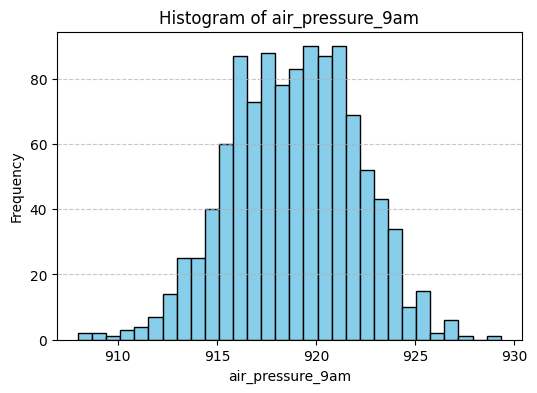

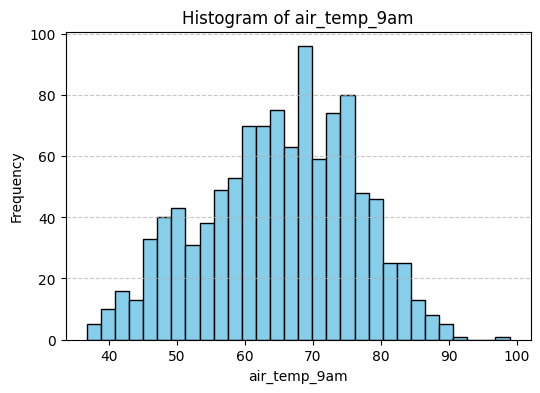

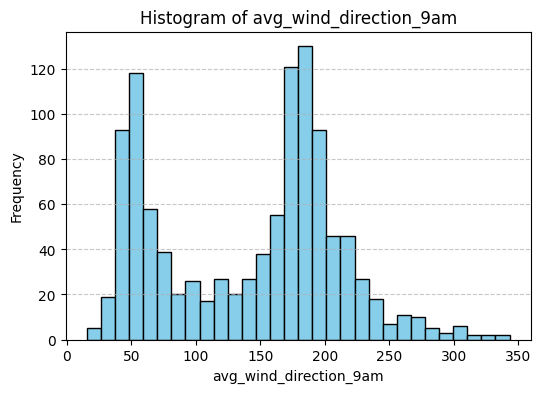

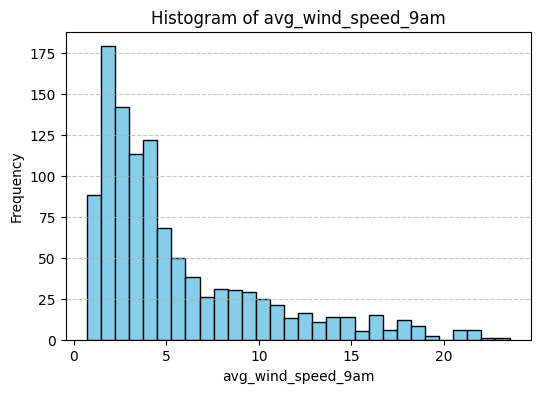

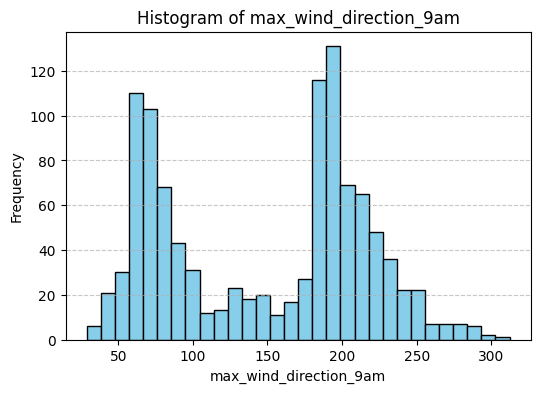

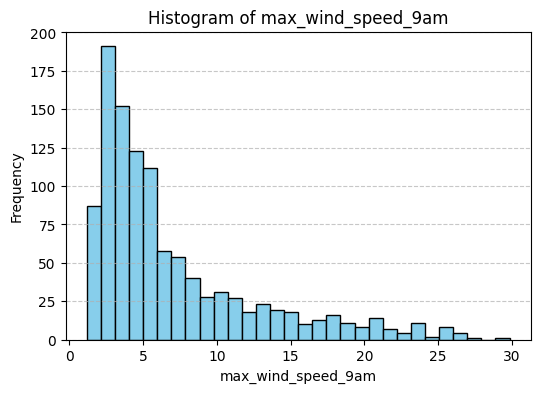

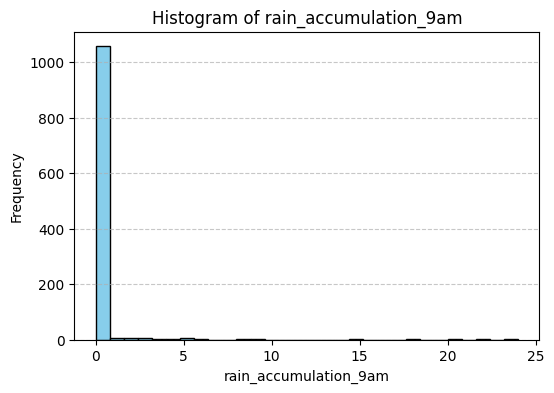

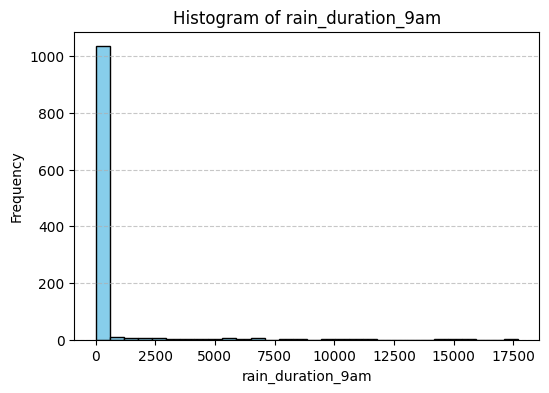

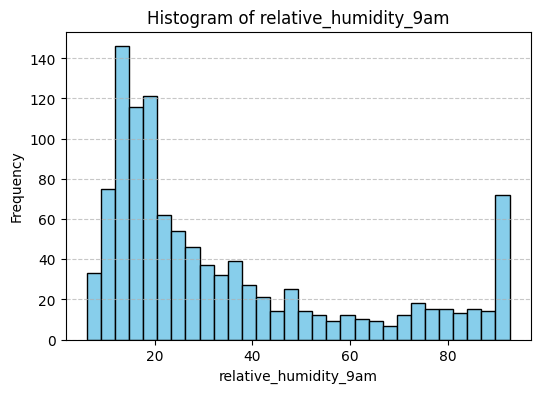

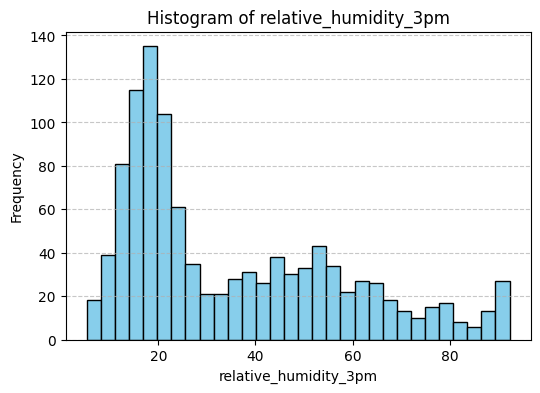

In [43]:
for column in columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [44]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [45]:
data['relative_humidity_9am'].value_counts()

relative_humidity_9am
21.110000    2
42.420000    1
21.360000    1
51.060000    1
24.383846    1
            ..
42.090000    1
47.610000    1
15.770000    1
17.638314    1
14.560000    1
Name: count, Length: 1094, dtype: int64

In [46]:
data.dropna(inplace=True)

In [47]:
data.shape

(1064, 11)

In [48]:
dependent_variable = 'relative_humidity_3pm'

In [49]:
independent_variables =['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_9am']


In [50]:
X = data[independent_variables]
y = data[dependent_variable]


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [54]:
humidity_reg = DecisionTreeRegressor(criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2, random_state=0)


In [58]:
humidity_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [60]:
y_predicted =humidity_reg.predict(X_test)
y_predicted[:10]


array([22.4393455 , 10.37      , 35.78      , 54.09      , 67.58      ,
       91.06      , 27.21      , 17.74857781, 39.43      , 90.3       ])

In [62]:
y_test[:10]

456     23.030000
845     19.408737
693     43.510000
259     53.840000
723     65.410000
224     89.400000
300     49.290000
442     13.019366
585     38.230000
1057    53.330000
Name: relative_humidity_3pm, dtype: float64

In [63]:
r2_score(y_test, y_predicted) * 100

69.18193032670989

In [64]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


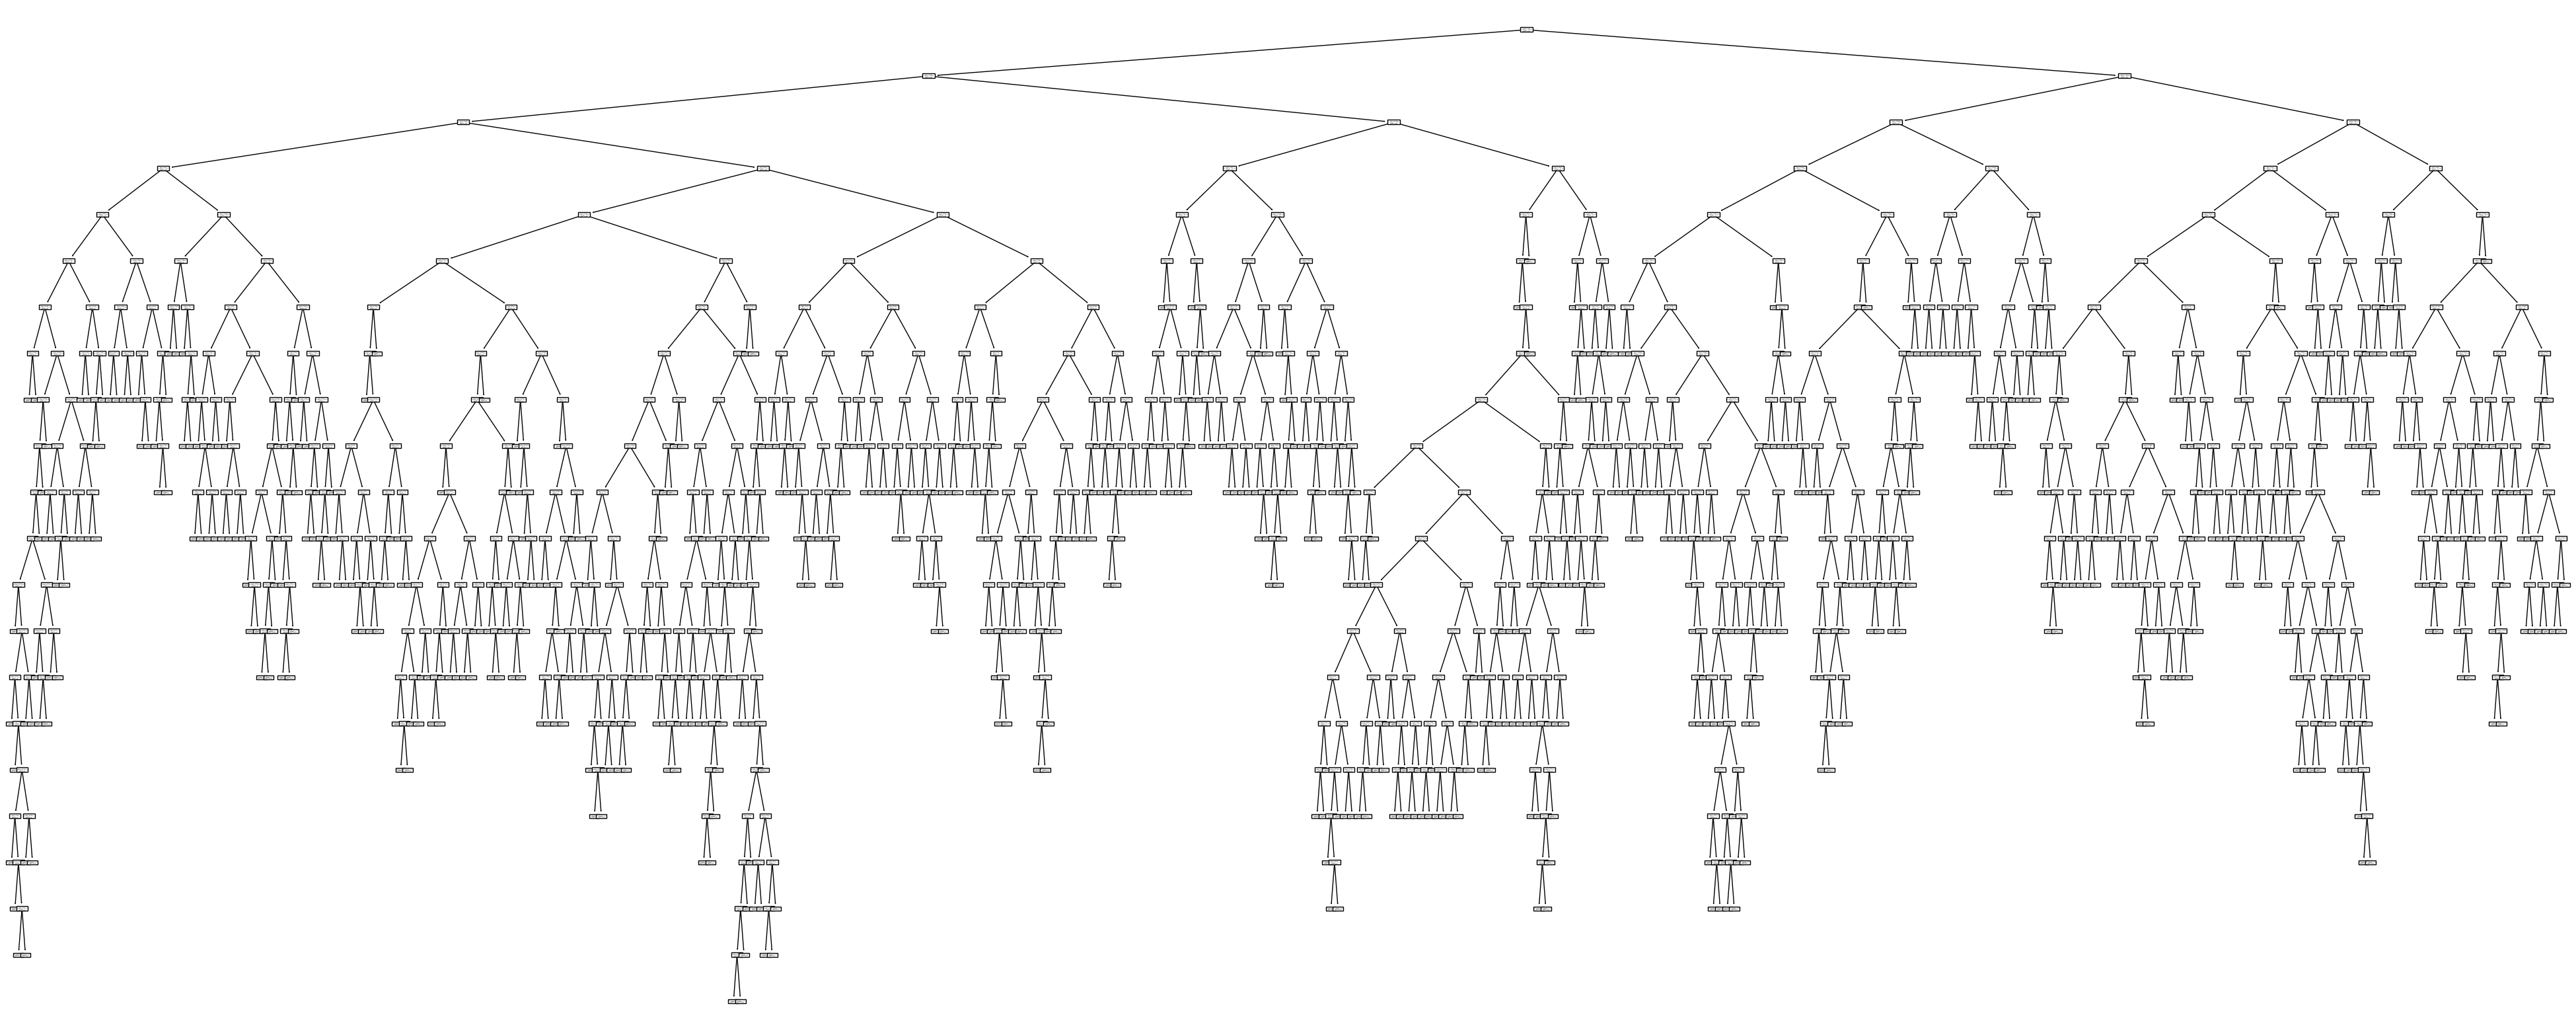

In [69]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(humidity_reg)
